In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
x=np.linspace(-8.0,8.0,100)
y=np.sqrt(10**2-x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

In [21]:
x1=np.linspace(-8.0,8.0,100)
y1=np.sqrt(8**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1, -x1])

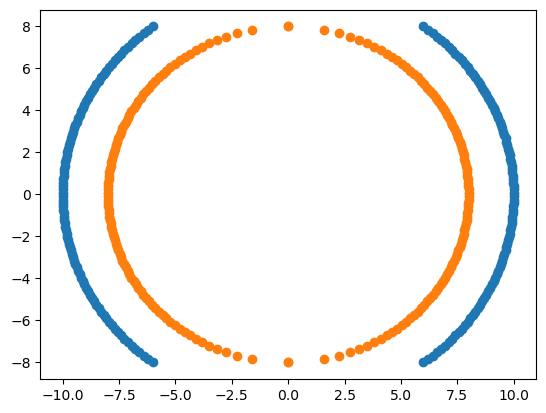

In [22]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [23]:
import pandas as pd
df1=pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2=pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df=df1.append(df2)
df.head(5)

/tmp/ipykernel_1563/270161726.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,X1,X2,Y
0,6.000000,-8.000000,0
1,6.209649,-7.838384,0
2,6.408372,-7.676768,0
3,6.597158,-7.515152,0
4,6.776837,-7.353535,0


In [24]:
df.tail(5)

,X1,X2,Y
195,-3.150479,-7.353535,1
196,-2.742717,-7.515152,1
197,-2.251053,-7.676768,1
198,-1.599918,-7.838384,1
199,-0.000000,-8.000000,1


## Polynomial Kernel

In [25]:
df['X1_square']=df['X1']**2
df['X2_square']=df['X2']**2
df['X1*X2']=df['X1']*df['X2']
df.head()

,X1,X2,Y,X1_square,X2_square,X1*X2
0,6.000000,-8.000000,0,36.000000,64.000000,-48.000000
1,6.209649,-7.838384,0,38.559739,61.440261,-48.673611
2,6.408372,-7.676768,0,41.067238,58.932762,-49.195587
3,6.597158,-7.515152,0,43.522498,56.477502,-49.578644
4,6.776837,-7.353535,0,45.925518,54.074482,-49.833709


In [34]:
X=df[['X1_square','X2_square','X1*X2']]
y=df.Y

In [35]:
from sklearn.model_selection import train_test_split
X_train,y_train,X_test,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [36]:
X_train.head()

,X1_square,X2_square,X1*X2
50,63.993470,0.006530,0.646432
63,95.239669,4.760331,21.292541
112,27.269054,36.730946,-31.648351
159,97.642690,2.357310,15.171491
83,34.687073,29.312927,31.886982


In [37]:
! pip install plotly

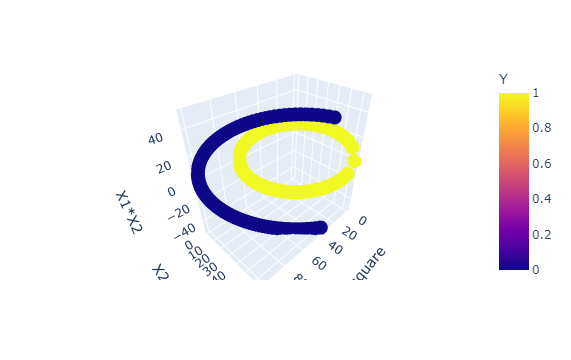

In [38]:
import plotly.express as px
fig=px.scatter_3d(df,x='X1_square',y='X2_square',z='X1*X2',color='Y')
fig.show()
plt.show()

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
classifier = SVC(kernel="poly")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [49]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

## RBF kernel

In [31]:
df.head()

,X1,X2,Y,X1_square,X2_square,X1*X2
0,6.000000,-8.000000,0,36.000000,64.000000,-48.000000
1,6.209649,-7.838384,0,38.559739,61.440261,-48.673611
2,6.408372,-7.676768,0,41.067238,58.932762,-49.195587
3,6.597158,-7.515152,0,43.522498,56.477502,-49.578644
4,6.776837,-7.353535,0,45.925518,54.074482,-49.833709


In [32]:
## Indpeendent Features
X=df.iloc[:,0:2]
y=df.Y

In [33]:
X.head()

,X1,X2
0,6.000000,-8.000000
1,6.209649,-7.838384
2,6.408372,-7.676768
3,6.597158,-7.515152
4,6.776837,-7.353535


In [40]:
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 400, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = 0)

In [42]:
classifier = SVC(kernel="rbf")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [43]:
classifier = SVC(kernel="poly")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [45]:
classifier = SVC(kernel="sigmoid")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.31

In [48]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0